In [1]:
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_valid.shape, y_valid.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


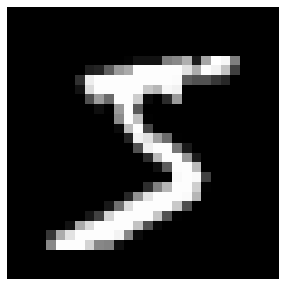

In [4]:
import matplotlib.pyplot as plt
s
def plot_image(data, idx):
    plt.figure(figsize=(5, 5))
    plt.imshow(data[idx], cmap="gray")
    plt.axis("off")
    plt.show()

plot_image(x_train, 0)

In [5]:
print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0 255
0 255


In [7]:
x_train = x_train / x_train.max()
x_valid = x_valid / x_valid.max()

print(x_train.min(), x_train.max())
print(x_valid.min(), x_valid.max())

0.0 1.0
0.0 1.0


In [8]:
print(x_train.shape, x_valid.shape)

x_train_in = x_train[..., tf.newaxis]
x_valid_in = x_valid[..., tf.newaxis]

print(x_train_in.shape, x_valid_in.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


In [10]:
#Sequential API를 이용한 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3, 3), activation='relu',
                          input_shape=(28, 28, 1), name='conv'),
    tf.keras.layers.MaxPooling2D((2, 2), name='pool'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [11]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history=model.fit(x_train_in, y_train, validation_data=(x_valid_in, y_valid), epochs=10)

2022-02-17 06:29:27.464032: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)


Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4014 - accuracy: 0.8906 - val_loss: 0.0860 - val_accuracy: 0.9738
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0819 - accuracy: 0.9774 - val_loss: 0.0644 - val_accuracy: 0.9801
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0594 - accuracy: 0.9818 - val_loss: 0.0674 - val_accuracy: 0.9789
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0485 - accuracy: 0.9849 - val_loss: 0.0537 - val_accuracy: 0.9817
Epoch 5/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0394 - accuracy: 0.9878 - val_loss: 0.0564 - val_accuracy: 0.9827
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0333 - accuracy: 0.9898 - val_loss: 0.0533 - val_accuracy: 0.9823
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0288 - accuracy: 0.9911 - val_loss: 0.0534 - val_ac

In [13]:
model.evaluate(x_valid_in, y_valid)

313/313 [==============================] - 1s 2ms/step - loss: 0.0584 - accuracy: 0.9833


[0.05843944102525711, 0.983299970626831]

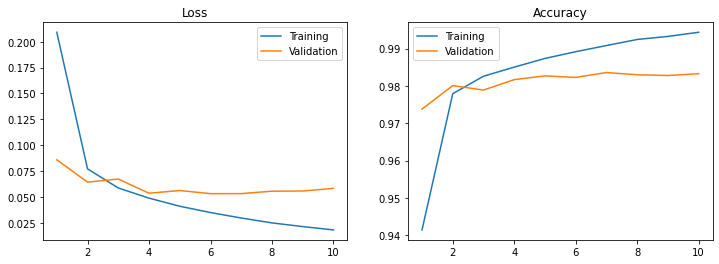

In [14]:
def plot_loss_acc(history, epoch):
    loss, val_loss = history.history['loss'], history.history['val_loss']
    acc, val_acc = history.history['accuracy'], history.history['val_accuracy']
    
    fig, axes = plt.subplots(1, 2, figsize=(12,4))
    
    axes[0].plot(range(1, epoch + 1), loss, label='Training')
    axes[0].plot(range(1, epoch + 1), val_loss, label='Validation')
    axes[0].legend(loc='best')
    axes[0].set_title('Loss')
    
    axes[1].plot(range(1, epoch + 1), acc, label='Training')
    axes[1].plot(range(1, epoch + 1), val_acc, label='Validation')
    axes[1].legend(loc='best')
    axes[1].set_title('Accuracy')
    
    plt.show()

plot_loss_acc(history, 10)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv (Conv2D)                (None, 26, 26, 32)        320       
_________________________________________________________________
pool (MaxPooling2D)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [18]:
model.output

<KerasTensor: shape=(None, 10) dtype=float32 (created by layer 'dense_1')>

In [19]:
model.layers

In [20]:
model.layers[0]

In [21]:
model.layers[0].input

<KerasTensor: shape=(None, 28, 28, 1) dtype=float32 (created by layer 'conv_input')>

In [22]:
model.layers[0].output

<KerasTensor: shape=(None, 26, 26, 32) dtype=float32 (created by layer 'conv')>

In [24]:
model.layers[0].weights

[<tf.Variable 'conv/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
 array([[[[ 2.14770123e-01,  5.35225987e-01, -2.22351551e-01,
           -4.33662295e-01,  6.11566715e-02, -4.03668033e-03,
            4.09300119e-01, -4.88926098e-02, -4.26067442e-01,
            7.48413265e-01, -4.02224153e-01,  1.18352287e-03,
           -2.68135935e-01, -2.10401211e-02,  1.83250532e-01,
            1.79717600e-01, -7.11562634e-01, -2.84978598e-01,
            3.49986464e-01,  5.20332992e-01,  2.81597316e-01,
            9.54752788e-02, -2.07878985e-02, -3.22951138e-01,
           -1.16424406e+00, -7.90193975e-01, -3.88122126e-02,
           -1.02553606e+00,  1.49689719e-01, -4.64404017e-01,
            2.62847453e-01,  2.59616166e-01]],
 
         [[ 1.36188269e-01, -2.96009108e-02,  3.39387149e-01,
            4.37364206e-02, -3.32041711e-01, -5.16579375e-02,
            7.42874444e-02,  3.84313869e-03,  1.44513085e-01,
           -1.36672661e-01,  4.53924656e-01,  2.09111407e-01,
           

In [25]:
activator = tf.keras.Model(inputs=model.input, outputs=[layer.output for layer in model.layers[:2]])

activations = activator.predict(x_train_in[0][tf.newaxis, ...])

len(activations)

2

In [26]:
conv_activation=activations[0]
conv_activation.shape

(1, 26, 26, 32)

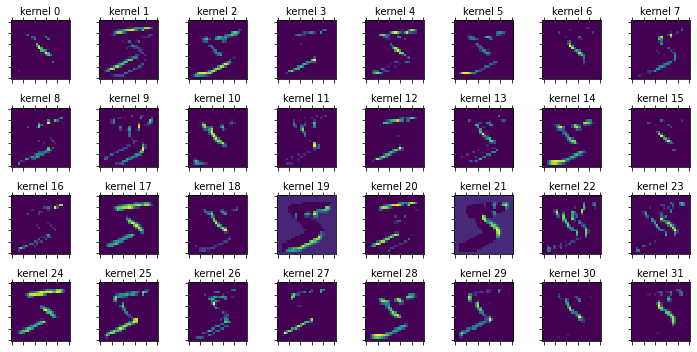

In [29]:
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32) :
    axes[i//8, i%8].matshow(conv_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()

In [30]:
pooling_activation=activations[1]
print(pooling_activation.shape)

(1, 13, 13, 32)


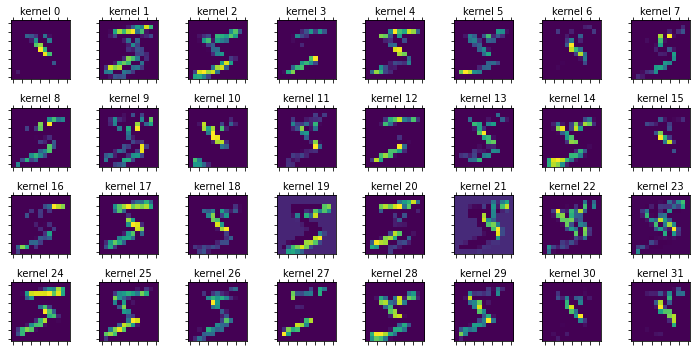

In [31]:
fig, axes = plt.subplots(4, 8)
fig.set_size_inches(10, 5)

for i in range(32) :
    axes[i//8, i%8].matshow(pooling_activation[0, :, :, i], cmap='viridis')
    axes[i//8, i%8].set_title('kernel %s'%str(i), fontsize=10)
    plt.setp(axes[i//8, i%8].get_xticklabels(), visible=False)
    plt.setp(axes[i//8, i%8].get_yticklabels(), visible=False)

plt.tight_layout()
plt.show()